#🪻 About Dataset

[Dataset on kaggle](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

####The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

### 📚 **Source of the Messages**

The dataset was built using several public sources:

1. **Spam Messages (425 total)**

   * Taken from **Grumbletext**, a UK website where users report spam.
   * Extracting these was difficult because users often described spam without quoting it directly.

2. **Ham (Legit) Messages**

   * **3,375 messages** from the **NUS SMS Corpus** (from students in Singapore).
   * **450 messages** from **Caroline Tag’s PhD thesis**.
   * **1,002 ham messages + 322 spam messages** from the **SMS Spam Corpus v0.1 Big**.

### 🧠 **Usage and Acknowledgement**

* The dataset is meant for **research and educational use**.
* If you use it in your research, you should cite this paper:
  *Almeida, T.A., Gómez Hidalgo, J.M., Yamakami, A. (2011). Contributions to the Study of SMS Spam Filtering.*


In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [224]:
# How to know the file encoding type
import chardet
with open("/content/spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result



{'encoding': 'Windows-1252', 'confidence': 0.7272080023536335, 'language': ''}

# Load Dataset

In [225]:
# load Dataset
df = pd.read_csv("/content/spam.csv",encoding='Windows-1252')

In [226]:
df.shape

(5572, 5)

In [227]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [228]:
# check if the last three columns contain data ?
print(df['Unnamed: 2'].isna().sum())
print(df['Unnamed: 3'].isna().sum())
print(df['Unnamed: 4'].isna().sum())

5522
5560
5566


In [229]:
# drop the last three columns
df.drop(columns = ['Unnamed: 2'	,'Unnamed: 3'	,'Unnamed: 4'],inplace=True)

In [230]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [231]:
data = pd.read_csv("/content/spam.csv", encoding='Windows-1252')

In [232]:
data.dropna(how='any',inplace=True,axis = 1)
# 'any' ->	Drop if any cell is NaN
# 'all' ->  Drop only if all cells are NaN

In [233]:
# set columns labels
data.columns = ['label','message']


In [234]:
data.shape

(5572, 2)

# Data Exploration


In [235]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [236]:
# check calss imblance
classes = data['label'].value_counts(normalize=True) * 100

In [237]:
classes

,proportion
label,
ham,86.593683
spam,13.406317


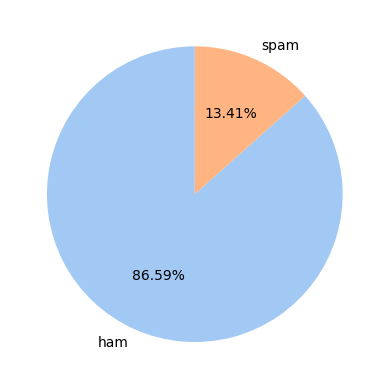

In [238]:
# draw pie chart of the value counts
plt.pie(classes.values,labels=classes.index,autopct='%1.2f%%', startangle=90,colors=sns.color_palette('pastel'))
plt.show()

# how to solve class imbalance ?
 1 - oversampling

 2 - undersampling

 3 - combination of them

 4 - class weight

 5 - use different metrics than accuracy

In [239]:
# Remove any spacial characters in the text using regex
# make all characters lower case
# we need to convert the words to it's origin
import re
text = "Hello Everyone, I love python 3.5. do you like liking liked it ????????"

In [240]:
# search for anything that isn't a character
text = re.sub('[^a-zA-Z]',' ',text)
# anything that isn't char ^ -> Xor then replace it with " "


In [241]:
# stemming
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [242]:
Stemmer = PorterStemmer()
Stemmer.stem('playing')


'play'

In [243]:
# download stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [244]:
# What are stopwords ?
from nltk.corpus import stopwords
for i in stopwords.words('english'):
  print(i)


a
about
above
after
again
against
ain
all
am
an
and
any
are
aren
aren't
as
at
be
because
been
before
being
below
between
both
but
by
can
couldn
couldn't
d
did
didn
didn't
do
does
doesn
doesn't
doing
don
don't
down
during
each
few
for
from
further
had
hadn
hadn't
has
hasn
hasn't
have
haven
haven't
having
he
he'd
he'll
her
here
hers
herself
he's
him
himself
his
how
i
i'd
if
i'll
i'm
in
into
is
isn
isn't
it
it'd
it'll
it's
its
itself
i've
just
ll
m
ma
me
mightn
mightn't
more
most
mustn
mustn't
my
myself
needn
needn't
no
nor
not
now
o
of
off
on
once
only
or
other
our
ours
ourselves
out
over
own
re
s
same
shan
shan't
she
she'd
she'll
she's
should
shouldn
shouldn't
should've
so
some
such
t
than
that
that'll
the
their
theirs
them
themselves
then
there
these
they
they'd
they'll
they're
they've
this
those
through
to
too
under
until
up
ve
very
was
wasn
wasn't
we
we'd
we'll
we're
were
weren
weren't
we've
what
when
where
which
while
who
whom
why
will
with
won
won't
wouldn
wouldn't
y
you
you'd
you'

In [245]:
print(text)

Hello Everyone  I love python      do you like liking liked it         


In [246]:
text = text.split()
text = [Stemmer.stem(word) for word in text if not word in stopwords.words('english')]

In [247]:
print(text)

['hello', 'everyon', 'i', 'love', 'python', 'like', 'like', 'like']


In [248]:
# combine the text again
text = ' '.join(text)

In [249]:
text

'hello everyon i love python like like like'

In [250]:
# combine all in one function
def preprocess(text):
  text = re.sub('[^a-zA-Z]',' ',text)
  text = text.lower()
  text = text.split()
  text = [Stemmer.stem(word) for word in text if not word in stopwords.words('english')]
  text = ' '.join(text)
  return text

In [251]:
# apply on our data
data['preprocessed_Message'] = data['message'].apply(preprocess)

In [252]:
data.message[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [339]:
data.message[10]

AttributeError: 'numpy.ndarray' object has no attribute 'message'

In [253]:
data.preprocessed_Message[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [254]:
data.message[10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [255]:
data.preprocessed_Message[10]

'gonna home soon want talk stuff anymor tonight k cri enough today'

In [256]:
## convert to numerical values

# Bag of Words (BoW)
# --------------------
# - Create a vocabulary of all unique words in the dataset.
# - Represent each message as a vector that counts how often each word appears.
# - Does not capture word order or context.
# - Repeated words get higher importance.
#=========================================================
# TF-IDF (Term Frequency - Inverse Document Frequency)
# ------------------------------------------------------
# - Calculates how often a word appears in a document (term frequency).
# - Also considers how rare the word is across all messages (inverse document frequency).
# - If a word appears in many messages, its importance is reduced.
#=========================================================
# Word Embeddings
# -----------------
# - Words are represented as dense vectors in a continuous space.
# - Captures meaning, context, and even relationships between words.
# - Similar words have similar vectors.


In [257]:
# we will use BOW
# from sklearn.feature_extraction.text import CountVectorizer
# cv =CountVectorizer()
# x = cv.fit_transform(data['preprocessed_Message']).toarray()


In [258]:
# get the features names
# cv.get_feature_names_out()

In [259]:
# x = pd.DataFrame(x,columns = cv.get_feature_names_out())

In [260]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Apply TF-IDF transformation on the preprocessed text
x = tfidf.fit_transform(data['preprocessed_Message']).toarray()


In [261]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [262]:
tfidf.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'zouk', 'zs', 'zyada'], dtype=object)

In [263]:
x = pd.DataFrame(x,columns = tfidf.get_feature_names_out())

In [264]:
x

,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [265]:
# Encoding of the labels
data.label
y= pd.get_dummies(data['label'],drop_first=True)

In [266]:
y

,spam
0,False
1,False
2,True
3,False
4,False
...,...
5567,True
5568,False
5569,False
5570,False


In [267]:
y.value_counts(normalize=True) * 100

,proportion
spam,
False,86.593683
True,13.406317


In [289]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))

## Training

In [290]:
from sklearn.model_selection import train_test_split

In [291]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2,stratify = y)

In [292]:
y_train.value_counts(normalize=True) * 100

,proportion
spam,
False,86.582903
True,13.417097


## solving class imbalance problem

#### SMOTE OVERSAMPLING

In [293]:
#we will use smote
# we will use smote after data splitting to prevent dara leakage
# from imblearn.over_sampling import SMOTE
# sm = SMOTE()
# x_train, y_train = sm.fit_resample(x_train,y_train)
# oversampling reduced the percision

In [294]:
y_train.value_counts(normalize=True) * 100

,proportion
spam,
False,86.582903
True,13.417097


#### CLASS WEIGHT

In [295]:
from sklearn.utils.class_weight import compute_class_weight


In [296]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train.values.ravel()), y=y_train.values.ravel())
# .ravel() → flattens it to a 1D array

In [297]:
class_weights

array([0.57748121, 3.72658863])

In [298]:
classes = np.unique(y_train.values.ravel())

In [299]:
weights_dict = dict(zip(classes, class_weights))

In [300]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [301]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = weights_dict)
lr.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight={np.False_: np.float64(0.577481212749417),
                                 np.True_: np.float64(3.7265886287625416)})

In [302]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight = weights_dict)
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={np.False_: np.float64(0.577481212749417),
                                     np.True_: np.float64(3.7265886287625416)})

In [303]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight = weights_dict)
rf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight={np.False_: np.float64(0.577481212749417),
                                     np.True_: np.float64(3.7265886287625416)})

## Evaluation

In [304]:
from sklearn.metrics import accuracy_score,recall_score,precision_score


In [305]:
pred = nb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,pred))
print("Recall: ",recall_score(y_test,pred))
print("Precision: ",precision_score(y_test,pred))

Accuracy:  0.9695067264573991
Recall:  0.7718120805369127
Precision:  1.0


In [306]:
pred = dt.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,pred))
print("Recall: ",recall_score(y_test,pred))
print("Precision: ",precision_score(y_test,pred))

Accuracy:  0.9506726457399103
Recall:  0.8657718120805369
Precision:  0.7865853658536586


In [307]:
pred = rf.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,pred))
print("Recall: ",recall_score(y_test,pred))
print("Precision: ",precision_score(y_test,pred))

Accuracy:  0.9802690582959641
Recall:  0.8523489932885906
Precision:  1.0


In [308]:
pred = lr.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,pred))
print("Recall: ",recall_score(y_test,pred))
print("Precision: ",precision_score(y_test,pred))

Accuracy:  0.9775784753363229
Recall:  0.9060402684563759
Precision:  0.9246575342465754


#### we want to focus on the false positive as we
#### don't want ham email to go to spam ->percision

In [310]:
# save models
pickle.dump(rf,open('rf.pkl','wb'))
pickle.dump(lr,open('lr.pkl','wb'))


In [314]:
import streamlit as st

In [320]:
# what i need to pred ?
# the preprocessing function
msg = st.text_input('Enter the message')
preprocessed = preprocess(msg)
tfidf = pickle.load(open('tfidf.pkl','rb'))
rf = pickle.load(open('rf.pkl','rb'))
lr = pickle.load(open('lr.pkl','rb'))
data = tfidf.transform([preprocessed]).toarray()
lr_pred = lr.predict(data)
rf_pred = rf.predict(data)
st.text(f'LR Prediction: {lr_pred[0]}')
st.text(f'RF Prediction: {rf_pred[0]}')



2025-05-07 07:49:24.271 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 07:49:24.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 07:49:24.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 07:49:24.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 07:49:24.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 07:49:24.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

DeltaGenerator()

In [340]:
# Save the code in script
%%writefile app.py
import streamlit as st
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

nltk.download('stopwords')
Stemmer = PorterStemmer()
def preprocess(text):
  text = re.sub('[^a-zA-Z]',' ',text)
  text = text.lower()
  text = text.split()
  text = [Stemmer.stem(word) for word in text if not word in stopwords.words('english')]
  text = ' '.join(text)
  return text


msg = st.text_input('Enter the message')
preprocessed = preprocess(msg)
tfidf = pickle.load(open('tfidf.pkl','rb'))
rf = pickle.load(open('rf.pkl','rb'))
lr = pickle.load(open('lr.pkl','rb'))
data = tfidf.transform([preprocessed]).toarray()
lr_pred = lr.predict(data)
rf_pred = rf.predict(data)
# prediction buuton
if st.button('Predict'):
   st.text(f'LR Prediction: {lr_pred[0]}')
   st.text(f'RF Prediction: {rf_pred[0]}')

Overwriting app.py


In [341]:
# get the password
!wget -q -O - https://loca.lt/mytunnelpassword

34.147.19.51

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦⠧⠇⠏
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.147.19.51:8501

your url is: https://orange-sheep-say.loca.lt
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegr